In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
fuel_data=pd.read_csv('/home/jlhb1984/py-projects/data/cases/Protocol PXK113 20 GALONES SOCIEDAD DE INVERSIONES DEL CARIBE.csv',sep=';')
fuel_data.info()
row_fuel_count=fuel_data.shape[0]
fuel_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   N Code  21 non-null     int64
 1   V       21 non-null     int64
dtypes: int64(2)
memory usage: 468.0 bytes


,N Code,V
0,0,0
1,37,1
2,151,2
3,386,3
4,611,4
5,833,5
6,1050,6
7,1275,7
8,1475,8
9,1698,9


In [17]:
df_data=pd.DataFrame()
fs01_x_values=[]
fs01_y_values=[]

for i in range(0,row_fuel_count):
    fs01_x_values.append(fuel_data.iloc[i,0])
    fs01_y_values.append(fuel_data.iloc[i,1])

df_data['N Code']=fs01_x_values
df_data['Volume']=fs01_y_values



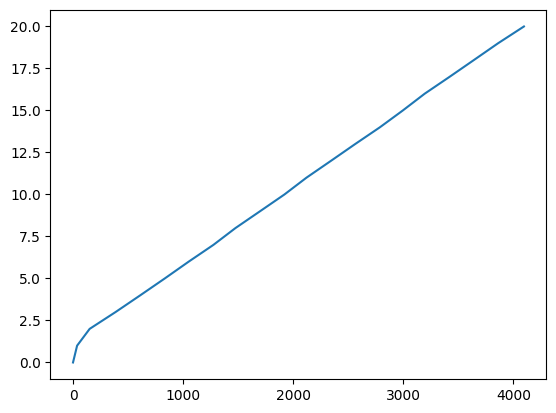

In [18]:
plt.plot(fs01_x_values,fs01_y_values)
#plt.plot(fs02_x_values,fs02_dec_value)

In [19]:
from sklearn.preprocessing import StandardScaler #Estandariza los datos.
from sklearn.linear_model import LinearRegression #Importo el modelo.
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#df_data.to_csv('/home/jlhb1984/py-projects/data/cases/Export.csv')

x=df_data['N Code'].values.reshape(-1, 1)#Si no se pone, sale error porque x_std y y_std requieren este reshape.
y=df_data['Volume'].values.reshape(-1, 1)
sc_x=StandardScaler()
sc_y=StandardScaler()
x_std=sc_x.fit_transform(x)
y_std=sc_y.fit_transform(y)
slr=LinearRegression()
slr.fit(x_std,y_std)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
X_cols=df_data['N Code'].values.reshape(-1,1)
y_col=df_data['Volume'].values.reshape(-1,1)

X=X_cols
y=y_col

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x=StandardScaler().fit(X)
sc_y=StandardScaler().fit(y)

X_train=sc_x.transform(X_train)
X_test=sc_x.transform(X_test)
y_train=sc_y.transform(y_train)
y_test=sc_y.transform(y_test)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [21]:
model = LinearRegression()
model.fit(X, y)

# 3. Access the Slope and Intercept
slope = model.coef_
intercept = model.intercept_

print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): [[0.00469407]]
Intercept: [0.9583297]


Text(0.5, 0, 'N code')

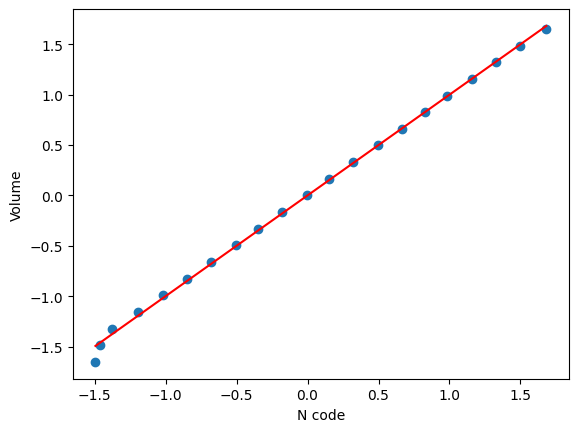

In [22]:
plt.scatter(x_std,y_std)
plt.plot(x_std,slr.predict(x_std),color='red')
plt.ylabel('Volume')
plt.xlabel('N code')

In [23]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

#print("r2 ", r2.round(4))
#print("mse: ", mse.round(4))
print("r2 ", r2)
print("mse: ", mse)

r2  0.9996390386089214
mse:  0.00023517181539965315


In [24]:
ncode=input("N Code: ")
num_galons_lr=sc_x.transform(np.array([ncode]).reshape(-1,1))
print("El valor en galones a partir del N Code es: ")
sc_y.inverse_transform(slr.predict(num_galons_lr))

El valor en galones a partir del N Code es: 


array([[5.76505598]])

Usando litros que es como funciona en TSO:

In [25]:
fuel_data['Liters']=0.0
fuel_volume_l=[]
print(row_fuel_count)

for i in range(0,row_fuel_count):
    fuel_volume_l.append(fuel_data.iloc[i,1]*3.78541)

fuel_data['Liters']=fuel_volume_l
fuel_data

21


,N Code,V,Liters
0,0,0,0.00000
1,37,1,3.78541
2,151,2,7.57082
3,386,3,11.35623
4,611,4,15.14164
5,833,5,18.92705
6,1050,6,22.71246
7,1275,7,26.49787
8,1475,8,30.28328
9,1698,9,34.06869


In [26]:
df_data=pd.DataFrame()
fs01_x_values=[]
fs01_y_values=[]

for i in range(0,row_fuel_count):
    fs01_x_values.append(fuel_data.iloc[i,0])
    fs01_y_values.append(fuel_data.iloc[i,2])

df_data['N Code']=fs01_x_values
df_data['liters']=fs01_y_values

df_data

,N Code,liters
0,0,0.00000
1,37,3.78541
2,151,7.57082
3,386,11.35623
4,611,15.14164
5,833,18.92705
6,1050,22.71246
7,1275,26.49787
8,1475,30.28328
9,1698,34.06869


In [27]:
x=df_data['N Code'].values.reshape(-1, 1)#Si no se pone, sale error porque x_std y y_std requieren este reshape.
y=df_data['liters'].values.reshape(-1, 1)
sc_x=StandardScaler()
sc_y=StandardScaler()
x_std=sc_x.fit_transform(x)
y_std=sc_y.fit_transform(y)
slr=LinearRegression()
slr.fit(x_std,y_std)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [28]:
X_cols=df_data['N Code'].values.reshape(-1,1)
y_col=df_data['liters'].values.reshape(-1,1)

X=X_cols
y=y_col

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x=StandardScaler().fit(X)
sc_y=StandardScaler().fit(y)

X_train=sc_x.transform(X_train)
X_test=sc_x.transform(X_test)
y_train=sc_y.transform(y_train)
y_test=sc_y.transform(y_test)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [29]:
model = LinearRegression()
model.fit(X, y)

# 3. Access the Slope and Intercept
slope = model.coef_
intercept = model.intercept_

print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): [[0.01776897]]
Intercept: [3.62767082]


In [30]:
ncode=input("N Code: ")
num_l_lr=sc_x.transform(np.array([ncode]).reshape(-1,1))
print("El valor en galones a partir del N Code es: ")
sc_y.inverse_transform(slr.predict(num_l_lr))

El valor en galones a partir del N Code es: 


array([[21.82310056]])